In [2]:
from __future__ import print_function
import numpy as np
import scipy as sp
import statsmodels.formula.api as smf
import pylab as pl
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
dataurl = 'https://raw.githubusercontent.com/fedhere/PUI2018_fb55/master/Lab9_fb55/Asc.csv'

In [8]:
df = pd.read_csv(dataurl, header=None, names=['x', 'y1','tmp2', 'y2', 'tmp3', 'tmp4', 'tmp5', 'tmp6'], sep="\t")

In [9]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [10]:
df.sort_values(by='x', inplace=True)

In [11]:
df

,x,y1,tmp2,y2,tmp3,tmp4,tmp5,tmp6
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
10,5.0,5.68,5.0,4.74,5.0,5.73,8.0,6.89
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71


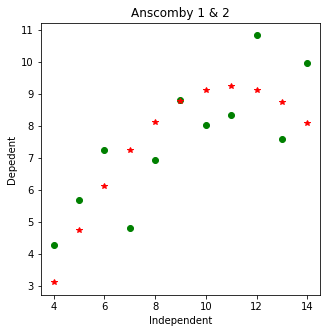

In [12]:
pl.figure(figsize=(5,5))
pl.plot(df['x'], df['y1'], 'go')
pl.plot(df['x'], df['y2'], 'r*')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 & 2');

# First Anscomby distribution: y1

## OLS linear fit  y1~x

In [13]:
OLS1 = smf.ols(formula='y1  ~ x', data=df).fit()
OLS1.summary()

/home/urwa/miniconda3/envs/PUI2018/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.99
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00217
Time:                        18:27:25   Log-Likelihood:                -16.841
No. Observations:                  11   AIC:                             37.68
Df Residuals:                       9   BIC:                             38.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0001      1.125      2.667      0.026       0.456       5.544
x              0.5001      0.118      4.241      0.002       0.233       0.767
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   2.788
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.289
Skew:                          -0.122   Prob(JB):                        0.865
Kurtosis:                       2.244   Cond. No.                         29.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

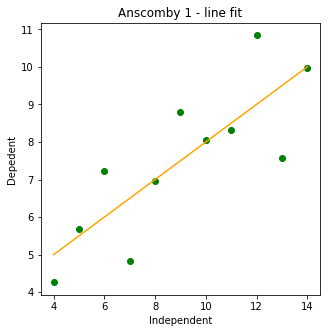

In [14]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS1.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - line fit');

## OLS quadratic fit  y1~x^2 + x

In [15]:
# create a new feature for x^2
df['x2'] = df['x']**2

In [17]:
OLS2 = smf.ols(formula='y1 ~ x2 + x',data=df).fit()
OLS2.summary()

/home/urwa/miniconda3/envs/PUI2018/lib/python2.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     y1   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     8.793
Date:                Mon, 26 Nov 2018   Prob (F-statistic):            0.00956
Time:                        18:28:05   Log-Likelihood:                -16.487
No. Observations:                  11   AIC:                             38.97
Df Residuals:                       8   BIC:                             40.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7551      3.288      0.230      0.824      -6.827       8.338
x2            -0.0316      0.043     -0.729      0.487      -0.132       0.068
x              1.0693      0.790      1.354      0.213      -0.752       2.891
==============================================================================
Omnibus:                        0.167   Durbin-Watson:                   2.957
Prob(Omnibus):                  0.920   Jarque-Bera (JB):                0.302
Skew:                          -0.220   Prob(JB):                        0.860
Kurtosis:                       2.318   Cond. No.                         954.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

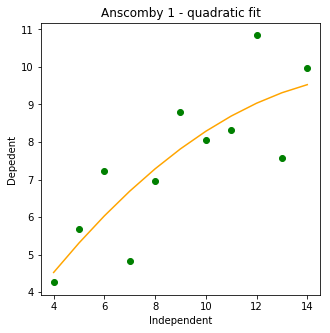

In [18]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y1'],'go')
pl.plot(df['x'], OLS2.predict(df),'-', color='orange')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit');

# Compare the models with the LR ratio test

In [19]:
OLS2.compare_lr_test(OLS1)

(0.70794919019374447, 0.40012547285804234, 1.0)

In [21]:
OLS2.compare_lr_test?

In [ ]:
Returns
-------
lr_stat : float
    likelihood ratio, chisquare distributed with df_diff degrees of
    freedom
p_value : float
    p-value of the test statistic
df_diff : int
    degrees of freedom of the restriction, i.e. difference in df
    between models

# Do it yourself as homework:
    1 write down in words what this result means
    2 do the same for the other series of data (y2)
    3 use the value of the likelihood which you can find in the models summary and the formula for the likelihood ration in the slides to derive the same result: you should be able to obtain the value of the statistics and by comparing it with a chisq table the relative p-value


### The lr test computes statistical test of the goodness of fit of the two models. The restricted model is the one iwth smaller number of paramters. The lr statistic follows a chisquared distribution with dof = difference in number of parameters. 

### The Null hypothesis is that the restricted model is statistically a better fit than the unrestricted one. We set our significane level at aplha = 0.05.

### Interpretting the result above:  The p value obtained is 0.4  (p_value > alpha) so we dont have enough evidence to  reject the null hypothesis. Thus we can not say that adding the quadratic terms imporoves the fit of the model.


In [22]:
OLS1_y2 = smf.ols(formula='y2 ~ x',data=df).fit()
OLS2_y2 = smf.ols(formula='y2 ~ x2 + x',data=df).fit()
OLS2_y2.compare_lr_test(OLS1_y2)

(146.63437980393013, 9.4331834207919584e-34, 1.0)

### Interpretting the result above:  The p value obtained is very small  (p_value < alpha) so we have enough evidence to reject the null hypothesis in favor of the alternate. Thus we can say that adding the quadratic terms imporoves the fit of the model for y2.

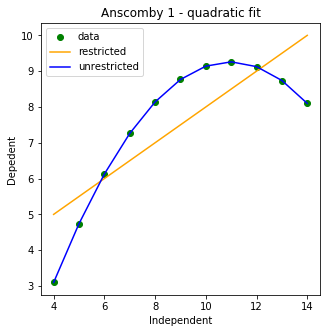

In [25]:
pl.figure(figsize=(5,5))
pl.plot(df['x'],df['y2'],'go', label='data')
pl.plot(df['x'], OLS1_y2.predict(df),'-', color='orange',label='restricted')
pl.plot(df['x'], OLS2_y2.predict(df),'-', color='blue',label='unrestricted')
pl.xlabel('Independent')
pl.ylabel('Depedent')
pl.title('Anscomby 1 - quadratic fit')
pl.legend()

### The plot of data and predictions of restricted and unrestricted model. This confirms our conclusion that model with quadratic term is a better fit.

In [57]:
from scipy import stats

In [58]:
def Lr_ratio_Test(unrestrictedModel, restrictedModel):
    lr_stat = -2*(restrictedModel.llf - unrestrictedModel.llf)
    dof_dif = restrictedModel.df_resid - unrestrictedModel.df_resid
    pvalue = stats.chi2.sf(lr_stat, dof_dif)
    return (lr_stat,pvalue,dof_dif)

In [59]:
Lr_ratio_Test(OLS2_y2, OLS1_y2)

(146.63437980393013, 9.4331834207919584e-34, 1.0)

# chi sq table for your convenience

![chi sq table](chisq.gif)

Equation of LR:
    
    LR = -2 log (Likelihood_restricted / likelihood_complex)
    
or equivalently

    LR = -2 (log(Likelihood)_restricted - log(Likelihood)_complex)

where log is the natural log (base e)